# Pembuatan Basic dalam Linear Regression

In [47]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


### Data X dan Y

In [48]:
panjang_data = 100

data_y = np.array([i * 0.1+ np.random.randn() for i in range(panjang_data)])
data_x = np.array([i*0.1 for i in range(panjang_data)])

### fungsi linear regresi

In [49]:
def linear_regresi(x, gradien):
    y = gradien*x       
    return y

#### melakukan perhitungan linear awal

In [50]:
x_prediksi = np.array([0, 10])
m_awal_prediksi = 5
y_prediksi = linear_regresi(x_prediksi, m_awal_prediksi)

#### menampilkan data awal

In [51]:
# # scatter itu adalah mengatur / menambahkan data berupa titik
# plt.scatter(data_x, data_y, color="green")
# plt.plot(x_prediksi, y_prediksi, color="red")

# # minX, maxX, minY, maxY
# plt.axis([0,10,0,10])
# plt.show()

In [52]:
m_prediksi = m_awal_prediksi
m_list_prediksi = []
x_list_prediksi = []
y_list_prediksi = []

# digunakan agar perpindahan prediksi jauh lebih halus dan akurat
learning_rate = 0.1

for i in range(1, panjang_data):
    y_prediksi = linear_regresi(data_x[i], m_prediksi)
    y_aslinya = data_y[i]

    error = y_aslinya - y_prediksi
    delta_m = learning_rate * error / data_x[i]
    m_prediksi = m_prediksi + delta_m

    m_list_prediksi.append(m_prediksi)
    y_list_prediksi.append(linear_regresi(np.array([0,10]), m_prediksi))
    x_list_prediksi.append(np.array([0,10]))


# plt.scatter(data_x, data_y, color="green")
# plt.plot(x_prediksi, [0, y_list_prediksi[-1]], color="red")
# print(x_list_prediksi[-1], y_list_prediksi[0])
# plt.axis([0,10,0,10])

# plt.show()

### visualisasi animasi prediksi

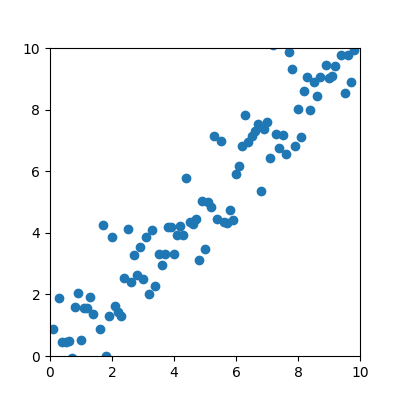

In [53]:
fig = plt.figure("Regresi Linear", figsize=(4, 4))
line, = plt.plot([], [], color="red")

def animate(frame_num):
    x = x_list_prediksi[frame_num]
    y = y_list_prediksi[frame_num]
    line.set_data((x, y))
    return line

plt.scatter(data_x, data_y)
plt.axis([0,10,0,10])

anime = FuncAnimation(fig, animate, frames=100, interval=100, repeat=False)
plt.show()